In [3]:
%pip install seaborn
%pip install matplotlib
#%pip install sklearn
%pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import seaborn

In [5]:
df = pd.read_csv('/Users/user/Documents/Into Ai/taxi_trip_pricing.csv')

In [6]:
print(df)

     Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
0               19.35     Morning     Weekday              3.0   
1               47.59   Afternoon     Weekday              1.0   
2               36.87     Evening     Weekend              1.0   
3               30.33     Evening     Weekday              4.0   
4                 NaN     Evening     Weekday              3.0   
..                ...         ...         ...              ...   
995              5.49   Afternoon     Weekend              4.0   
996             45.95       Night     Weekday              4.0   
997              7.70     Morning     Weekday              3.0   
998             47.56     Morning     Weekday              1.0   
999             22.85     Morning     Weekend              3.0   

    Traffic_Conditions Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0                  Low   Clear       3.56         0.80             0.32   
1                 High   Clear        NaN         0.62   

In [7]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [10]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,27.772941,2.533808,3.509893,1.219858,0.288221,61.825089,57.663525
std,21.153175,1.108915,0.871082,0.430351,0.114834,32.128436,43.958741
min,1.270000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,13.135000,2.000000,2.722500,0.840000,0.190000,36.530000,33.583875
50%,26.420000,3.000000,3.545000,1.200000,0.280000,61.210000,50.157850
75%,38.827500,4.000000,4.260000,1.580000,0.387500,88.435000,69.146575
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       562 non-null    float64
 1   Time_of_Day            562 non-null    object 
 2   Day_of_Week            562 non-null    object 
 3   Passenger_Count        562 non-null    float64
 4   Traffic_Conditions     562 non-null    object 
 5   Weather                562 non-null    object 
 6   Base_Fare              562 non-null    float64
 7   Per_Km_Rate            562 non-null    float64
 8   Per_Minute_Rate        562 non-null    float64
 9   Trip_Duration_Minutes  562 non-null    float64
 10  Trip_Price             562 non-null    float64
dtypes: float64(7), object(4)
memory usage: 52.7+ KB


In [23]:
X = df[['Trip_Distance_km', 'Trip_Duration_Minutes', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Passenger_Count', 'Traffic_Conditions', 'Weather', 'Time_of_Day','Day_of_Week']]
y = df['Trip_Price']

<Axes: >

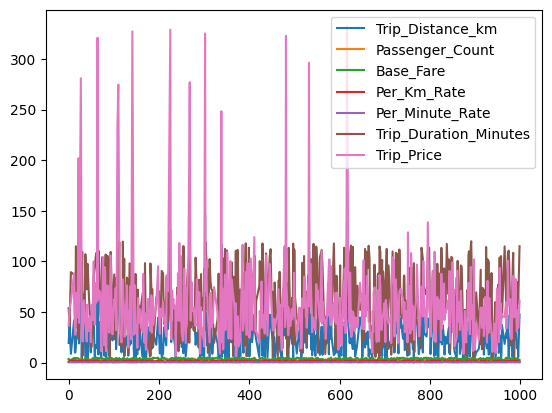

In [14]:
df.plot()

In [15]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [26]:
df["Time_of_Day"] = encoder.fit_transform(df["Time_of_Day"])

In [27]:
for col in df.select_dtypes("object"): 
    df[col] = encoder.fit_transform(df[col])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 90)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [31]:
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = regressor.predict(X_test)

In [33]:
y_pred, y_test

(array([ 29.6187766 , 101.56494626,  56.39946242,  78.78300268,
         97.49985659,  43.32593731,  14.21869297,  50.18068118,
         53.83110941,  59.15096552,  38.67596132,  77.80927859,
         72.43578789, 108.30175915,  91.31372181,  25.98343022,
         76.14718499,  41.11424504,  39.90494974,  36.6413954 ,
        111.08399516,  65.37238537,  -2.16692258,  44.7591102 ,
         22.87645141,  72.17941917, -27.56651968,  57.54097594,
         18.34083656, -18.46602081,   2.33935322,  22.74575901,
         44.8990266 ,  98.1544068 , 106.78242493, 119.52599372,
          5.19865443,  43.52904126,  59.13031343,  34.07179737,
         93.89684224,  63.6328971 ,  31.91484607,  62.12746226,
         63.26265675, 119.05303535,  -8.23179216, 103.03157464,
         79.16517384, 254.06924921,  38.59378858,  91.01289151,
         34.42260516,  49.35167646,  45.72898771,  36.64218351,
         79.11130661,  -5.54607176,  59.52893033,  11.82447476,
         81.3271341 ,  94.38073545,   0.

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred = y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"mean square error is {mse}")
print(f"mean absolure error is {mae}")
print(f"r2 score is {score}")
print(f"root mean square error is {rmse}")

mean square error is 308.12423557634224
mean absolure error is 10.919487182823795
r2 score is 0.8735310030801517
root mean square error is 17.55346790740628


In [36]:
pip install seaborn # If X_train is a DataFrame


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


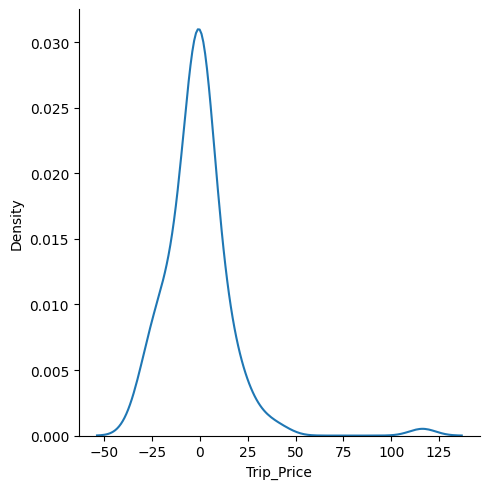

In [37]:
import seaborn as sns
residuals = y_test-y_pred
sns.displot(residuals, kind = 'kde')

In [ ]:
#Normal Distribution

In [41]:
import pickle
pickle.dump(regressor, open("regression.pkl", "wb"))

In [ ]:
pickle.dump(regressor, open("scaler.pkl", "wb"))